In [69]:
import datetime
import random
import decimal
import pickle
import matplotlib.pyplot as plt

decimal.getcontext().prec = 11
plt.rcParams["figure.figsize"] = (30, 25)

In [70]:
def get_list_brith_days(number_brith_days: int) -> list[datetime.date]:
    brithdays = []
    for _ in range(number_brith_days):
        start_year = datetime.date(2000, 1, 1)
        random_number_days = datetime.timedelta(random.randint(0, 364))
        brithday = start_year + random_number_days
        brithdays.append(brithday)
    return brithdays


def get_match(brithdays: list[datetime.date]) -> datetime.date | None:
    if len(brithdays) == len(set(brithdays)):
        return None

    for idx, brithday_a in enumerate(brithdays):
        for brithday_b in brithdays[idx + 1:]:
            if brithday_a == brithday_b:
                return brithday_a

In [104]:
START_TOTAL_TEST = 51
FINISH_TOTAL_TEST = 100
COUNT_TEST = 1000
probabilities_data = {}

for num in range(START_TOTAL_TEST, FINISH_TOTAL_TEST + 1):
    count_match = decimal.Decimal("0")
    for i in range(COUNT_TEST):
        brithdays = get_list_brith_days(num)
        if get_match(brithdays) is not None:
            count_match += 1
            
    probability = count_match / COUNT_TEST * 100
    print(f"For {num} people ({COUNT_TEST} times): {probability:.10f}%")
    probabilities_data[num] = probability

For 51 people (1000 times): 97.2000000000%
For 52 people (1000 times): 97.7000000000%
For 53 people (1000 times): 97.8000000000%
For 54 people (1000 times): 98.2000000000%
For 55 people (1000 times): 98.7000000000%
For 56 people (1000 times): 99.2000000000%
For 57 people (1000 times): 99.0000000000%
For 58 people (1000 times): 98.6000000000%
For 59 people (1000 times): 99.5000000000%
For 60 people (1000 times): 99.3000000000%
For 61 people (1000 times): 99.3000000000%
For 62 people (1000 times): 99.9000000000%
For 63 people (1000 times): 99.7000000000%
For 64 people (1000 times): 99.9000000000%
For 65 people (1000 times): 99.7000000000%
For 66 people (1000 times): 99.4000000000%
For 67 people (1000 times): 99.8000000000%
For 68 people (1000 times): 99.8000000000%
For 69 people (1000 times): 99.9000000000%
For 70 people (1000 times): 99.8000000000%
For 71 people (1000 times): 100.0000000000%
For 72 people (1000 times): 99.9000000000%
For 73 people (1000 times): 100.0000000000%
For 74 pe

In [110]:
with (open("test_30_e6.data", "rb") as f1, open("test_31_35_e6.data", "rb") as f2, 
      open("test_36_40_e6.data", "rb") as f3, open("test_41_50_e6.data", "rb") as f4, open("test_51_100_e3.data", "rb") as f5):
    d1 = pickle.load(f1)
    d2 = pickle.load(f2)
    d3 = pickle.load(f3)
    d4 = pickle.load(f4)
    d5 = pickle.load(f5)
data = {**d1, **d2, **d3, **d4, **d5}

In [108]:
test_51_100_e3 = probabilities_data.copy()

In [109]:
with open("test_51_100_e3.data", "wb") as f:
    pickle.dump(test_51_100_e3, f)

In [102]:
with open("brithday_problem_1.data", "wb") as f:
    pickle.dump(data, f)

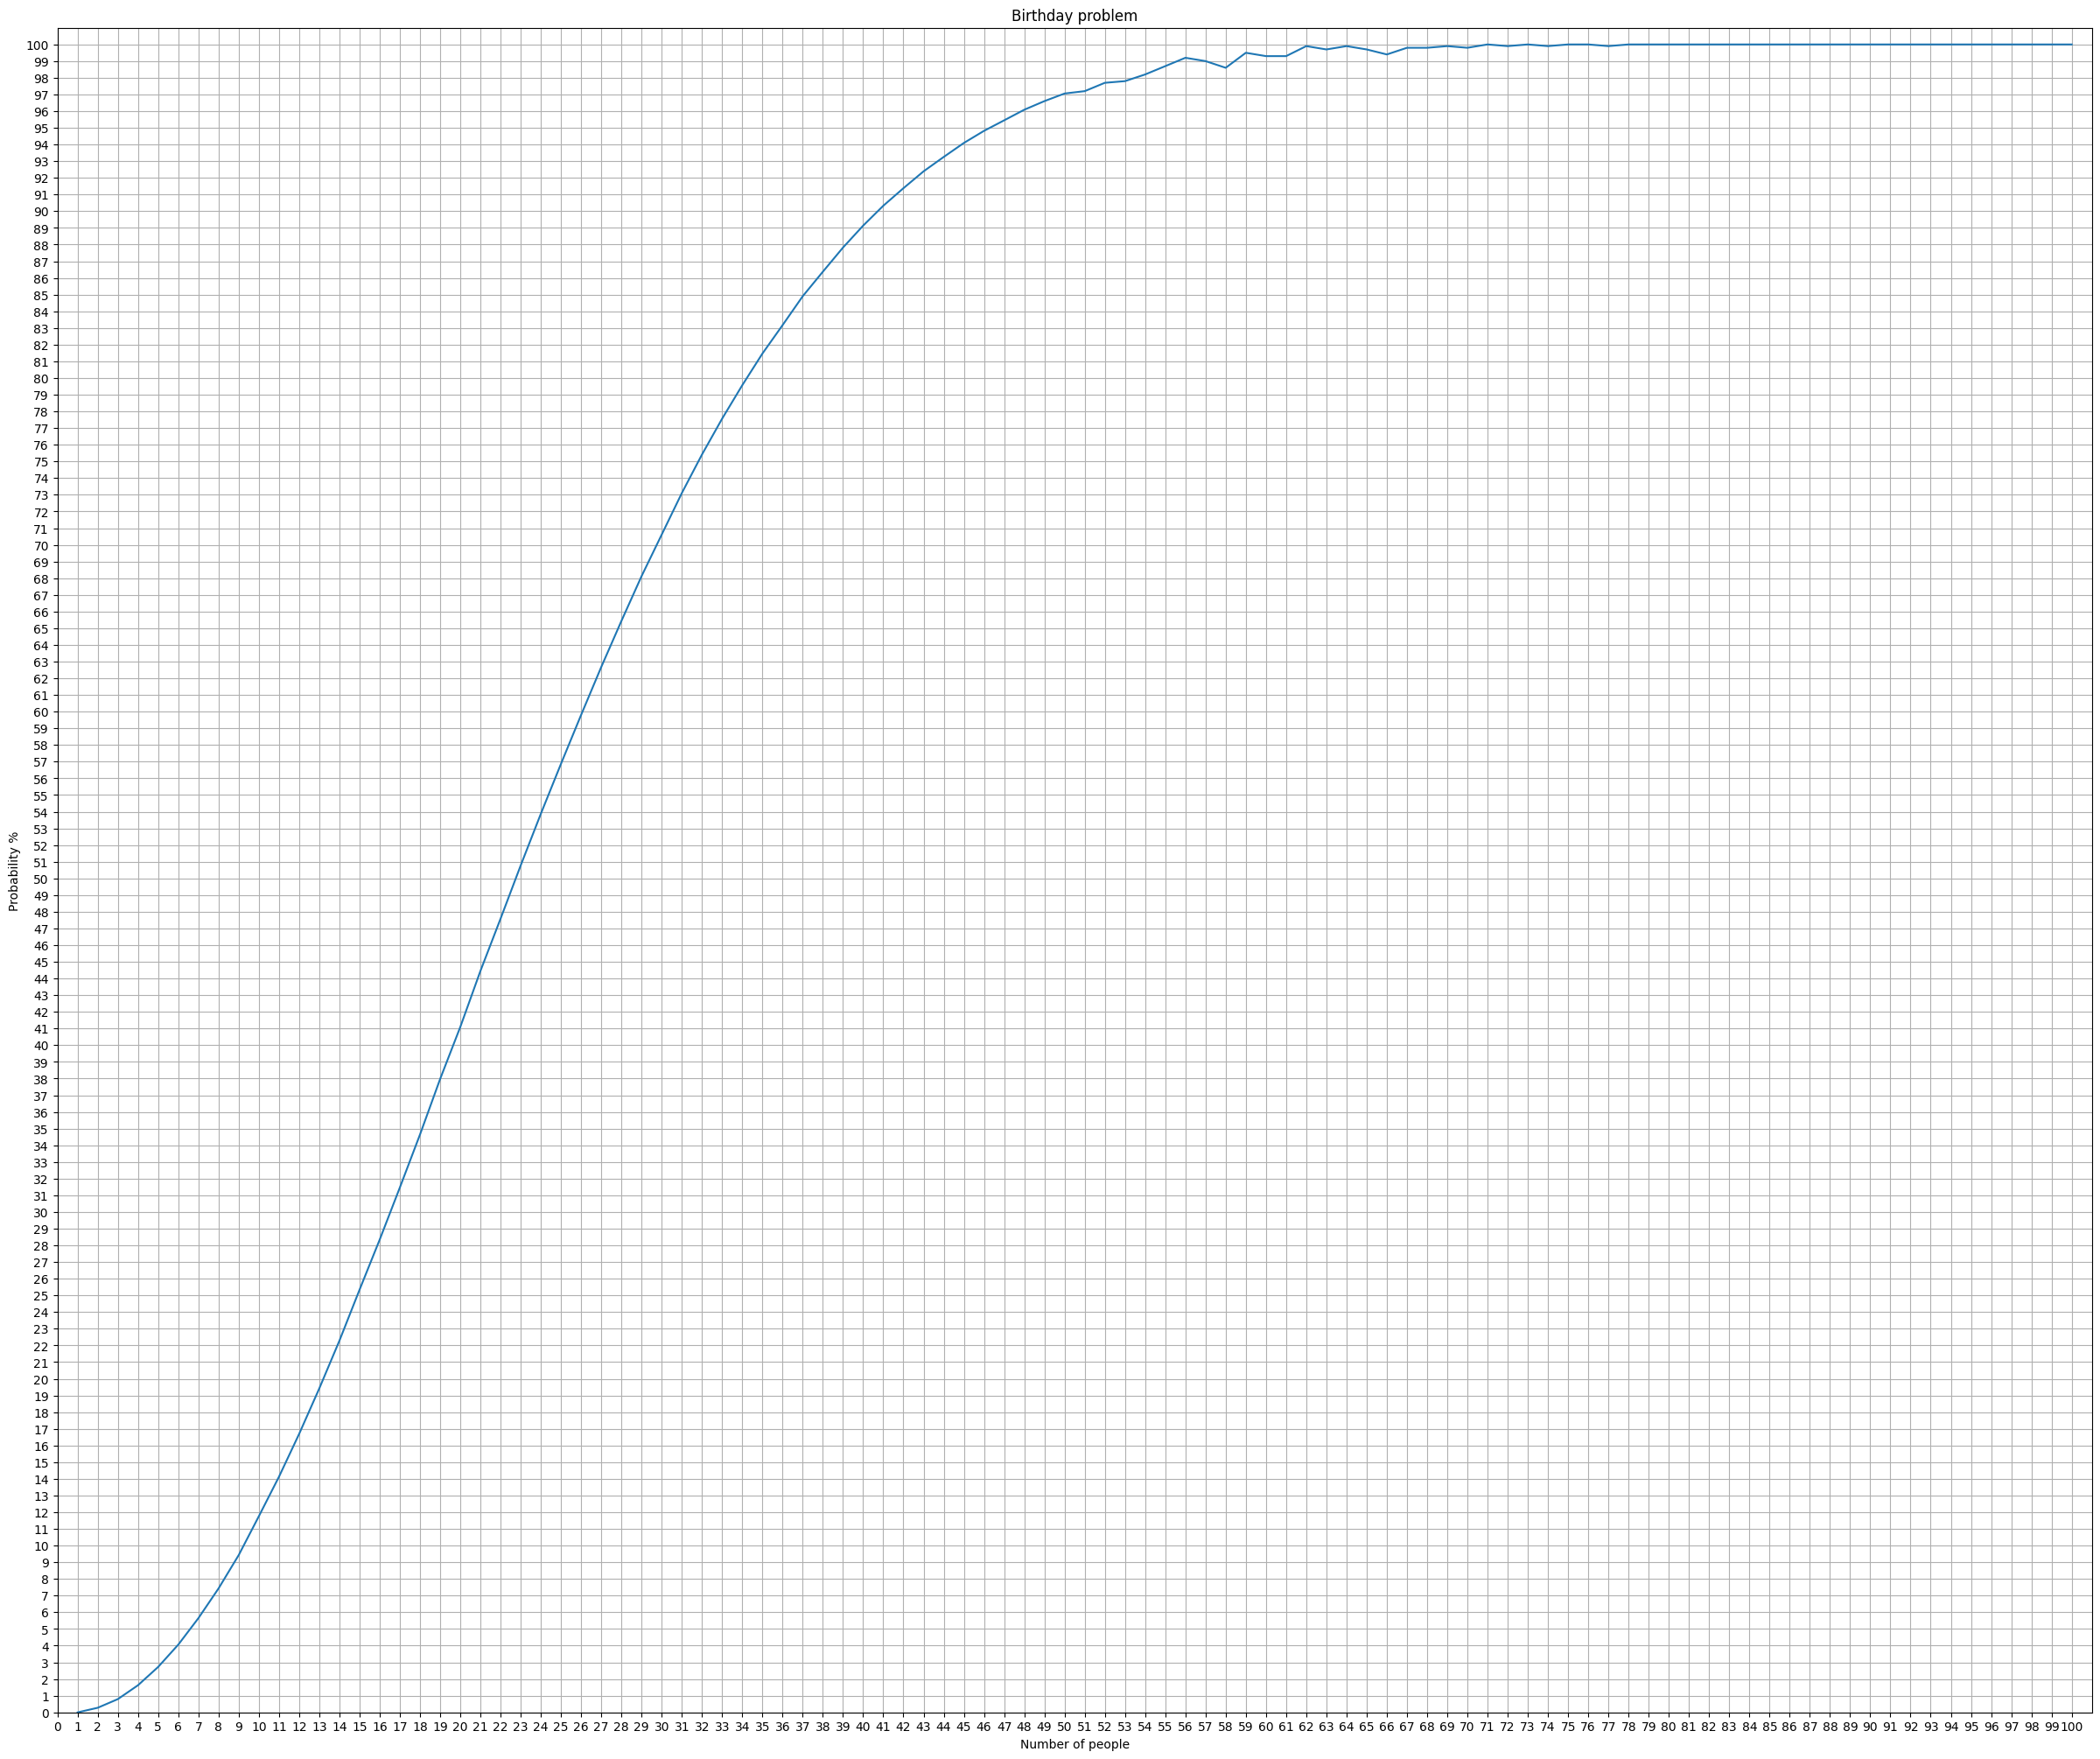

In [111]:
x = list(data.keys())
y = list(data.values())

plt.plot(x, y)
plt.axis([0, 101, 0, 101])
plt.grid(visible=True)

plt.xticks(list(range(101)))
plt.yticks(list(range(101)))

plt.title("Birthday problem")
plt.ylabel("Probability %")
plt.xlabel("Number of people")

plt.show()